# Mushroom Edibility Classification

**Link**

https://www.kaggle.com/uciml/mushroom-classification

**Context**

Although this dataset was originally contributed to the UCI Machine Learning repository nearly 30 years ago, mushroom hunting (otherwise known as "shrooming") is enjoying new peaks in popularity. Learn which features spell certain death and which are most palatable in this dataset of mushroom characteristics. And how certain can your model be?

**Content**

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified through the target attribute `class` as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one.

The dataset consists of the following attributes:
- class - edible=e, poisonous=p
- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
- bruises: bruises=t,no=f
- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
- gill-attachment: attached=a,descending=d,free=f,notched=n
- gill-spacing: close=c,crowded=w,distant=d
- gill-size: broad=b,narrow=n
- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
- stalk-shape: enlarging=e,tapering=t
- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- veil-type: partial=p,universal=u
- veil-color: brown=n,orange=o,white=w,yellow=y
- ring-number: none=n,one=o,two=t
- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

**Task (Classification)**

Your task is to use the present data set to predict the edibility of a mushroom sample. To do this, use the `Logistic Regression` and `XGBoost` methods for this task. You must also include a third method that you have selected yourself.

First of all, get an overview of the project in your group. Then carefully read the checklist for machine learning projects and think about how you want to organize your group work. It is strongly recommended that all task items are completed by all group members. You can divide the focus among yourself, but make sure that all members are as well informed as possible about the content.

Use the checklist for machine learning projects as a guide when working on the task. Document all the individual steps that are listed there (main and sub-items). Make sure to use Markdown Cells for your documentation. Document the functionality of your algorithms (all three) with equations and explanations. Dont forget, this project is a task for five students. We expect a detailed documentation of your approach and your results.

**Note**

We are aware that there are examples and solutions for the selected data sets on popular platforms, e.g. Kaggle. You are welcome to use them as a guide. But remember that at the end of the project, your own work will be assessed. We compare the results with the popular solutions of common platforms. We would like to recognize the independence in your work and see a difference to the existing solution approaches.

**ML Project Checklist**
1. Frame the problem and look at the big picture. 
2. Get the data. 
3. Explore the data to gain insights. 
4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms. 
5. Explore many different models and short-list the best ones. 
6. Fine-tune your models and combine them into a great solution. 
7. Present your solution. 
8. Launch, monitor, and maintain your system.

# 1. Framing the problem

The primary objective of this project is to estimate the probability that a given mushroom sample is edible, based on various features such as gill size, cap color, and other morphological characteristics. 

The resulting machine learning models could potentially be integrated into a broader **"mushroom guidance" application**. In such an app, users could take a photo of a mushroom, and the system would provide an initial estimate of its edibility. This approach frames the problem as a supervised learning classification task, where performance can be measured using metrics such as accuracy, precision, and recall. Thus, besides a full-feature model, a more specified "user" model trained on a reduced feature space solely including visual features has been implemented.
Given the real-world risk of misclassification, particular attention must be paid to minimizing false positives (i.e., predicting a poisonous mushroom as edible). While a reliable system would need to exceed a defined accuracy threshold to be considered practical, the aim of this project is to assess feasibility.

Nonetheless, real-life expertise should not be disregarded. The application could also support experts by providing a second opinion, comparable to how machine learning assists doctors with diagnostics in fields like radiology. This hybrid approach (combining expert knowledge with algorithmic estimation) could lead to more robust and safer classification outcomes.

# 2. Getting the data
 
The data has been downloaded and stored in CSV format to facilitate loading and manipulation within standard data science tools such as Pandas. A copy from the original data was created to perform the following data analysis and model training steps on.

**Außerdem zu erwähnen**:
- mussten manche Daten hinzugefügt werden weil "?"- oder "NaN"-Eintrag ?
- 

In [23]:
# ─── Standard Library ─────────────────────────────────────────────────
import math
import time
from typing import List, Optional
from itertools import combinations

# ─── Data Handling ───────────────────────────────────────────────────
import numpy as np
import pandas as pd

# ─── Visualization ───────────────────────────────────────────────────
import matplotlib.pyplot as plt
import seaborn as sns

# ─── Statistical Tests ────────────────────────────────────────────────
from scipy.stats import chi2_contingency

# ─── Preprocessing & Feature Engineering ─────────────────────────────
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    LabelEncoder,
    StandardScaler,
)

# ─── Model Selection & Hyperparameter Tuning ─────────────────────────
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    RandomizedSearchCV,
    GridSearchCV,
)
from sklearn.feature_selection import SelectFromModel

# ─── Machine Learning Models ─────────────────────────────────────────
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, DMatrix

# ─── Evaluation Metrics & Utilities ──────────────────────────────────
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    classification_report,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    make_scorer,
)

# ─── Warnings ─────────────────────────────────────────────────────────
import warnings
warnings.filterwarnings("ignore")


In [24]:
df_raw = pd.read_csv(r'data/mushrooms.csv')
print(f"Raw Data: {df_raw.shape[0]} rows, {df_raw.shape[1]} columns")


# create copies of the original DataFrame
df = df_raw.copy()

df.get('veil-type').value_counts() # veil-type is constant, so we can drop it
df.drop(columns=['veil-type'], inplace=True)

Raw Data: 8124 rows, 23 columns


# 3. Exploring the data


The dataset, sourced from the UCI Machine Learning Repository, consists of 8,124 complete samples with no missing values. It includes 23 categorical features, each representing a specific characteristic of mushrooms, such as cap-shape, odor, veil-color, and habitat. All variables are categorical, with varying cardinality: while some, like the target variable edibility, are binary, others, such as gill-color, contain more than 10 distinct categories. 

General guidelines:
- Create a copy of the data for exploration (down sampling if necessary).
- Keep record of your data exploration (Jupyter notebook).
- Study each attribute and its characteristics: 
    Name, Type (categorical, int/float, bounded/unbounded, text, structured, etc.), % missing values, Noisiness (stochastic, outliers, rounding errors, etc.), 
    Type of distribution (Gaussian, uniform, logarithmic, etc.), Possibly useful for the task?
- For supervised learning tasks, identify the target attribute(s).
- Visualize the data. -> Scatterplot, HeatMaps etc
- Study the correlations between attributes.
- Study how you would solve the problem manually.
- Identify the promising transformations you may want to apply.
- Identify extra data that would be useful.
- Document what you have learned.

In [25]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,4,9,9,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,s,w,w,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,5176,4936,4464,4384,7924,7488,3968,2388,4040,3148


In [26]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

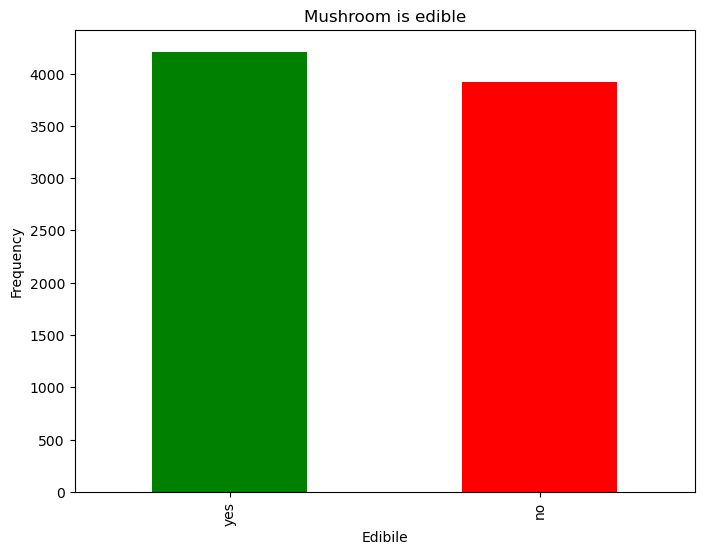

In [28]:
# Bar plot for Column 0 "edible"
df.iloc[:,0] = df.iloc[:,0].replace("e","yes") # replacing e with yes
df.iloc[:,0] = df.iloc[:,0].replace("p","no")  # replacing p with no

plt.figure(figsize=(8, 6))
df['class'].value_counts().plot(kind='bar', color=["green", "red"], label='Edible')
plt.title('Mushroom is edible')
plt.xlabel('Edibile')
plt.ylabel('Frequency')
plt.show()

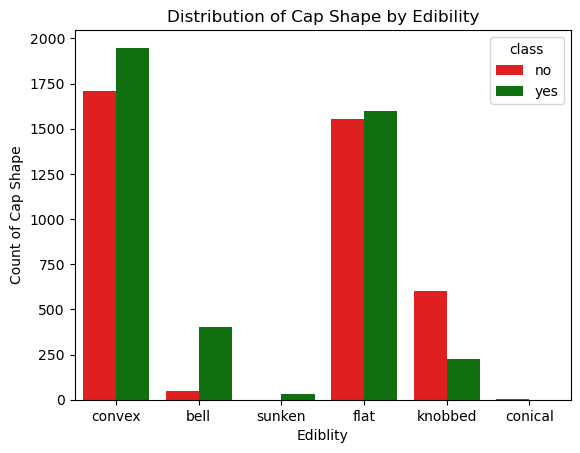

In [29]:
# With 'paired bar' plots there is a good vizualation for the dependecy of single attributes, what can be very useful for classifing data.

shape_names = {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'}

labeled_data = df.copy() # using the previously defined shape_names dict the full names on the x-axis can be displayed
labeled_data['cap-shape'] = labeled_data['cap-shape'].map(shape_names)

palette = {'yes': 'green', 'no': 'red'}

sns.countplot(x='cap-shape', hue='class', data=labeled_data, palette=palette)
                                                     
plt.title('Distribution of Cap Shape by Edibility')
plt.xlabel('Ediblity')
plt.ylabel('Count of Cap Shape')
plt.show()

# First paired bar plot has a random attribute to show the type of plot.



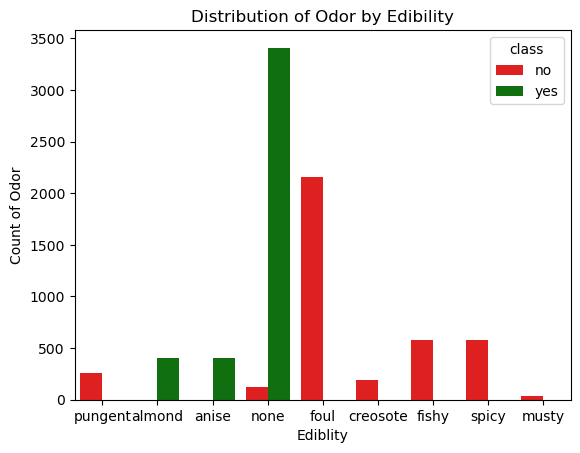

In [30]:
odor_names = {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'}

labeled_data = df.copy()
labeled_data['odor'] = labeled_data['odor'].map(odor_names)

palette = {'yes': 'green', 'no': 'red'}

sns.countplot(x='odor', hue='class', data=labeled_data, palette=palette)   
                                                          
plt.title('Distribution of Odor by Edibility')
plt.xlabel('Ediblity')
plt.ylabel('Count of Odor')
plt.show()

# In this paired bar plot you can clearly see that oder is a very important indicator for edibility.

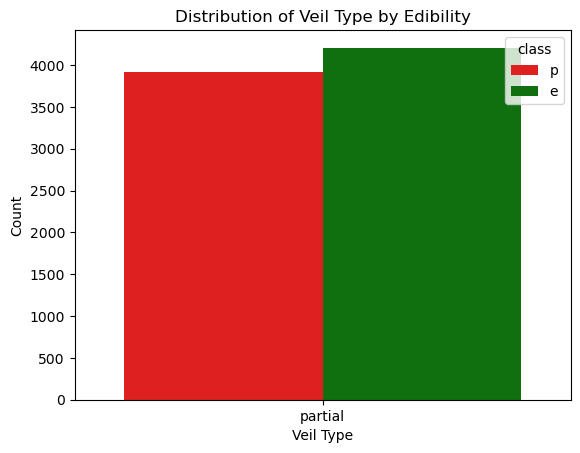

In [31]:
# Define mapping from code to descriptive veil type names
veil_type_names = {'p': 'partial', 'u': 'universal'}

# Work on a copy of the raw data so we can map and visualize without losing the original
labeled_data = df_raw.copy()

# Map the veil-type codes ('p','u') to their full names
labeled_data['veil-type'] = labeled_data['veil-type'].map(veil_type_names)

# Define a palette that matches the actual class codes:
# 'e' = edible, 'p' = poisonous
palette = {'e': 'green', 'p': 'red'}

# Plot the count of each veil type, separated by edibility class
sns.countplot(
    x='veil-type', 
    hue='class', 
    data=labeled_data, 
    palette=palette
)  # This paired bar plot shows how veil-type (partial vs. universal) relates to edibility

plt.title('Distribution of Veil Type by Edibility')
plt.xlabel('Veil Type')
plt.ylabel('Count')
plt.show()

# Note: In this dataset only 'partial' appears, so 'universal' bars won’t be shown.
# Since veil-type has no variance here, you can safely drop this column before modeling.


In [32]:
# double checked with value_counts()

veil_type_counts = df_raw["veil-type"].value_counts()

print(veil_type_counts)


veil-type
p    8124
Name: count, dtype: int64


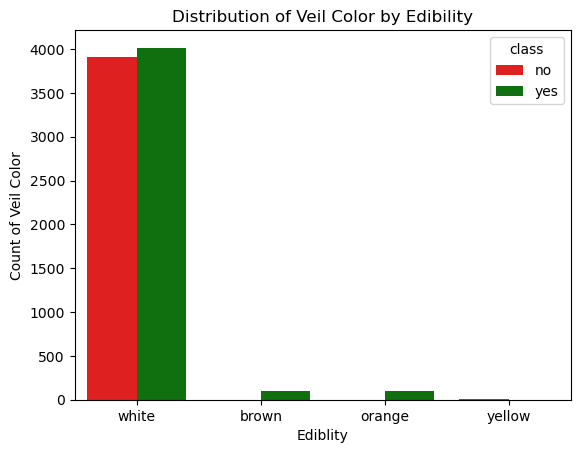

In [33]:
veil_color_names = {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'}

labeled_data = df.copy()
labeled_data['veil-color'] = labeled_data['veil-color'].map(veil_color_names)

palette = {'yes': 'green', 'no': 'red'}

sns.countplot(x='veil-color', hue='class', data=labeled_data, palette=palette)   # I found this 'paired bar' plot, which I think visualizes the 
                                                        # relationsip between edibility and cap shape better than the prevoius heatmap 
                                                          
plt.title('Distribution of Veil Color by Edibility')
plt.xlabel('Ediblity')
plt.ylabel('Count of Veil Color')
plt.show()

# Data for veil-color are very unbalanced. There are no poisonus mushrooms with brown or organge veil. 
# But there are in realitiy for example Cortinarius rubellus with an orange veil. So veil-color has to be handled with care.
# For possible future data this property will stay in the data set.
# Other unbalanced properties are gill-attachment and ring-number.


In [34]:
def cramers_v(x, y):
    # Build contingency table of counts for x and y
    ct = pd.crosstab(x, y)
    # Total number of observations
    n = ct.values.sum()
    # Number of rows and columns in the contingency table
    r, k = ct.shape
    # If either variable has fewer than 2 categories, Cramér's V is not defined
    if r < 2 or k < 2:
        return np.nan
    # Compute chi-squared statistic (without Yates' correction)
    chi2 = chi2_contingency(ct, correction=False)[0]
    # Apply formula for Cramér's V
    return np.sqrt(chi2 / (n * min(r-1, k-1)))


def get_top_features(df: pd.DataFrame, target: str, top_n: int = 5) -> list:
    # Compute Cramér's V for each feature against the target
    scores = {
        col: cramers_v(df[col], df[target])
        for col in df.columns if col != target
    }
    # Remove features where Cramér's V could not be computed (NaN)
    scores = {k: v for k, v in scores.items() if not np.isnan(v)}
    # Sort features by descending association strength
    sorted_feats = sorted(scores.items(), key=lambda x: -x[1])
    # Return the top_n feature names
    return [feature for feature, _ in sorted_feats[:top_n]]


def nominal_assoc_matrix(df: pd.DataFrame) -> pd.DataFrame:
    # Get list of all column names
    cols = df.columns
    # Initialize a square matrix with 1s on the diagonal
    M = pd.DataFrame(np.eye(len(cols)), index=cols, columns=cols)
    # Compute Cramér's V for each unique pair of columns
    for c1, c2 in combinations(cols, 2):
        v = cramers_v(df[c1], df[c2])
        # Fill both [c1, c2] and [c2, c1] for symmetry
        M.loc[c1, c2] = M.loc[c2, c1] = v
    return M


In [35]:

# 1) Show full pairwise matrix
V = nominal_assoc_matrix(df)
display(V.style.background_gradient('Blues'))

# 2) Extract top 5 and top 15 features *against* the target class
top5_features  = get_top_features(df, target='class', top_n=5)
top15_features = get_top_features(df, target='class', top_n=15)

print("Top  5 features according to Cramér’s V:", top5_features)
print("Top 15 features according to Cramér’s V:", top15_features)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.245571,0.196925,0.218427,0.501530,0.971005,0.129200,0.348387,0.540024,0.680830,0.102019,0.406805,0.587944,0.574837,0.524850,0.514725,0.153421,0.214772,0.603271,0.752645,0.487376,0.440136
cap-shape,0.245571,1.000000,0.203721,0.171431,0.255606,0.245516,0.154978,0.081702,0.346823,0.235100,0.307104,0.360155,0.160055,0.112243,0.214668,0.170397,0.224458,0.199408,0.208181,0.250994,0.241279,0.271124
cap-surface,0.196925,0.203721,1.000000,0.225273,0.134377,0.238446,0.210841,0.338222,0.277414,0.257618,0.078770,0.314652,0.144121,0.169393,0.252472,0.257451,0.134370,0.099147,0.224726,0.232623,0.262080,0.251007
cap-color,0.218427,0.171431,0.225273,1.000000,0.217648,0.332026,0.247965,0.399956,0.470307,0.282430,0.595394,0.385320,0.257079,0.320134,0.276539,0.279258,0.150920,0.337731,0.558073,0.286514,0.305809,0.326779
bruises,0.501530,0.255606,0.134377,0.217648,1.000000,0.660906,0.137359,0.299473,0.369596,0.650326,0.099364,0.571235,0.575184,0.566732,0.483226,0.492838,0.133964,0.071122,0.768492,0.612390,0.300576,0.530920
odor,0.971005,0.245516,0.238446,0.332026,0.660906,1.000000,0.261795,0.429768,0.760919,0.390260,0.575843,0.619751,0.416352,0.507273,0.450204,0.446679,0.104691,0.742821,0.696915,0.396389,0.374899,0.370058
gill-attachment,0.129200,0.154978,0.210841,0.247965,0.137359,0.261795,1.000000,0.071489,0.108984,0.780160,0.186485,0.221303,0.094589,0.124696,0.977755,0.977755,0.955097,0.203775,0.250744,0.826898,0.414080,0.436527
gill-spacing,0.348387,0.081702,0.338222,0.399956,0.299473,0.429768,0.071489,1.000000,0.108333,0.325755,0.080895,0.575685,0.437267,0.414870,0.401152,0.375507,0.098653,0.245659,0.290314,0.308599,0.673949,0.542608
gill-size,0.540024,0.346823,0.277414,0.470307,0.369596,0.760919,0.108984,0.108333,1.000000,0.784064,0.214576,0.627578,0.170060,0.150917,0.366078,0.347172,0.113972,0.194983,0.570653,0.660680,0.517812,0.499326
gill-color,0.680830,0.235100,0.257618,0.282430,0.650326,0.390260,0.780160,0.325755,0.784064,1.000000,0.612360,0.515254,0.353863,0.377980,0.420948,0.417087,0.453427,0.444296,0.518523,0.485242,0.424979,0.458522


Top  5 features according to Cramér’s V: ['odor', 'spore-print-color', 'gill-color', 'ring-type', 'stalk-surface-above-ring']
Top 15 features according to Cramér’s V: ['odor', 'spore-print-color', 'gill-color', 'ring-type', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'gill-size', 'stalk-color-above-ring', 'stalk-color-below-ring', 'bruises', 'population', 'habitat', 'stalk-root', 'gill-spacing', 'cap-shape']


### 

# 4. Preparing the data

Missing entries, represented by "?" were removed from the dataset.

Afterwards the **categorical** feature values were mapped to numerical codes usind an Encoder. This transformation is necessary because numerical input rather than categorical strings are required.
**One-Hot Encoding** is chosen over alternatives such as Label Encoding because it avoids introducing artificial ordinal relationships between categories and is suitable for our selected models (linear and tree-based).

Since our dataset contains only categorical features (which are one-hot encoded), feature scaling is not necessary.

In [36]:
def prepare_data(df, exclude_features=None, test_size=0.2, random_state=42):
    """Clean the data, drop optional features, encode target, and split into train/test sets."""
    # 1. Handle missing values in 'stalk-root'
    df_clean = df[df['stalk-root'] != '?'].copy()
    if exclude_features:
        df_clean.drop(columns=exclude_features, inplace=True, errors='ignore')
    # 2. Encode target label to 0/1
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(df_clean['class'])
    X = df_clean.drop(columns=['class'])
    # 3. Stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state
    )
    print(f"After dropping missing 'stalk-root': {df_clean.shape[0]} samples remain.")
    print(f"Train/Test split: {X_train.shape[0]} train and {X_test.shape[0]} test samples.")
    return X_train, X_test, y_train, y_test, label_encoder

In [37]:
# Prepare data for full feature set
X_train_all, X_test_all, y_train_all, y_test_all, label_enc_all = prepare_data(df_raw, exclude_features=None)

# Prepare data for reduced feature set (exclude the top 15 predictive features)
X_train_red, X_test_red, y_train_red, y_test_red, label_enc_red = prepare_data(df_raw, exclude_features=top15_features)
print("Excluded features for reduced set:", top15_features)

#Prepare dataset for small feature list, only 10 Features that can easyl be checked by a normal perosn in the forest while collecitng mushrooms
exclude_features_forest = [
    "gill-size",
    "stalk-shape",
    "stalk-root",
    "stalk-surface-above-ring",
    "stalk-surface-below-ring",
    "stalk-color-above-ring",
    "stalk-color-below-ring",
    "veil-type",
    "veil-color",
    "spore-print-color",
    "population",
]

X_train_forest, X_test_forest, y_train_forest, y_test_forest, label_enc_forest = \
    prepare_data(df_raw, exclude_features=exclude_features_forest)


After dropping missing 'stalk-root': 5644 samples remain.
Train/Test split: 4515 train and 1129 test samples.
After dropping missing 'stalk-root': 5644 samples remain.
Train/Test split: 4515 train and 1129 test samples.
Excluded features for reduced set: ['odor', 'spore-print-color', 'gill-color', 'ring-type', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'gill-size', 'stalk-color-above-ring', 'stalk-color-below-ring', 'bruises', 'population', 'habitat', 'stalk-root', 'gill-spacing', 'cap-shape']
After dropping missing 'stalk-root': 5644 samples remain.
Train/Test split: 4515 train and 1129 test samples.


In [38]:
def preprocess_once(X_tr, X_te):
    cats = X_tr.columns.tolist()
    # 1) One-hot encode
    ohe = ColumnTransformer([
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cats)
    ], remainder='drop')
    X_tr_ohe = ohe.fit_transform(X_tr)
    X_te_ohe = ohe.transform(X_te)

    # 2) Scale (variance normalize) for LogisticRegression
    scaler = StandardScaler(with_mean=False)
    X_tr_scl = scaler.fit_transform(X_tr_ohe)
    X_te_scl = scaler.transform(X_te_ohe)

    return {
        'ohe_tr':  X_tr_ohe,
        'ohe_te':  X_te_ohe,
        'scl_tr':  X_tr_scl,
        'scl_te':  X_te_scl,
        'ohe':     ohe,
        'scaler':  scaler
    }

In [39]:

prep_all = preprocess_once(X_train_all, X_test_all)
prep_red = preprocess_once(X_train_red, X_test_red)
prep_small = preprocess_once(X_train_forest, X_test_forest)

# 5. Selecting and training the model

1. If the data is huge, sample smaller training sets so you can train many different models in a reasonable time. 
2. Try to automate the process as much as possible. 
3. Train many quick models from different categories (e.g., linear, naive Bayes, SVM, Rand. Forests, neural net, etc.) using standard parameters. 
4. Measure and compare performance: For each model, use N-fold cross-validation and compute mean and standard deviation of performance.
5. Analyze the most significant attributes/features for each algorithm. 
6. Analyze the types of errors the models make: What data would a human have used to avoid these errors? 
7. Have a quick round of feature selection and feature engineering. 
8. Have one or two more quick iterations of the five previous steps. 
9. Short-list the top three to five most promising models, preferring models that make different types of errors.


Models relevant for this project: `Logistic Regression`, `XGBoost` and `ThirdModelToBeChosen` (maybe a DecisionTree?)

### 5.1 XGBoost
Training and testing  the xgboost model

In [40]:
def train_xgboost(X_tr, y_tr, X_te, y_te):
    """Train & eval XGBoost baseline."""
    pipe = Pipeline([
        ('enc', ohe_preprocessor),
        ('feat_sel', SelectFromModel(XGBClassifier(eval_metric='logloss', random_state=42), threshold='median')),
        ('clf', XGBClassifier(eval_metric='logloss', random_state=42))
    ])
    return evaluate_pipeline(pipe, X_tr, y_tr, X_te, y_te)

### 5.2 Logistic Regression

In [41]:

def train_logistic(X_tr, y_tr, X_te, y_te):
    """Train & eval Logistic Regression baseline."""
    pipe = Pipeline([
        ('enc', ohe_preprocessor),
        ('scale', StandardScaler(with_mean=False)),
        ('clf', LogisticRegression(max_iter=10000, random_state=42))
    ])
    return evaluate_pipeline(pipe, X_tr, y_tr, X_te, y_te)

### 5.3 Random Forest
has been selected as the third model. 

In [42]:
def train_random_forest(X_tr, y_tr, X_te, y_te):
    """Train & eval Random Forest baseline."""
    pipe = Pipeline([
        ('enc', ohe_preprocessor),
        ('feat_sel', SelectFromModel(RandomForestClassifier(random_state=42), threshold='median')),
        ('clf', RandomForestClassifier(random_state=42))
    ])
    return evaluate_pipeline(pipe, X_tr, y_tr, X_te, y_te)

run it

In [43]:
# Funktion Factory, um per Encoder zu bauen:
def make_pipelines(ohe):
    return {
        'LogisticRegression': Pipeline([
            ('enc',   ohe),
            ('scale', StandardScaler(with_mean=False)),
            ('clf',   LogisticRegression(max_iter=10_000, random_state=42))
        ]),
        'RandomForest': Pipeline([
            ('enc', ohe),
            ('fs',  SelectFromModel(RandomForestClassifier(random_state=42), threshold='median')),
            ('clf', RandomForestClassifier(random_state=42))
        ]),
        'XGBoost': Pipeline([
            ('enc', ohe),
            ('fs',  SelectFromModel(XGBClassifier(eval_metric='logloss', random_state=42), threshold='median')),
            ('clf', XGBClassifier(eval_metric='logloss', random_state=42))
        ])
    }


# ALL
pipes_all = make_pipelines(ohe_all)
results_all = {name: evaluate_pipeline(pipe, Xtr_all, ytr_all, Xte_all, yte_all)
               for name,pipe in pipes_all.items()}

# REDUCED
pipes_red = make_pipelines(ohe_red)
results_red = {name: evaluate_pipeline(pipe, Xtr_red, ytr_red, Xte_red, yte_red)
               for name,pipe in pipes_red.items()}

# Ergebnisse ausgeben
import pandas as pd
print("=== ALL Features ===")
display(pd.DataFrame([{k:v for k,v in res.items() if k!='pipe'}]
                     for res in results_all.values()).T.rename(columns=lambda x:list(results_all.keys())[x]))
print("=== REDUCED Features ===")
display(pd.DataFrame([{k:v for k,v in res.items() if k!='pipe'}]
                     for res in results_red.values()).T.rename(columns=lambda x:list(results_red.keys())[x]))

# Konfusionsmatrizen plotten
plot_confusion(results_all, Xte_all, yte_all, title="ALL Features")
plot_confusion(results_red, Xte_red, yte_red, title="REDUCED Features")


NameError: name 'ohe_all' is not defined

### 5.4 Model Performance Comparison

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

def summarize_results(results_dict):
    """Puts metrics into DataFrame."""
    rows = []
    for name, res in results_dict.items():
        rows.append({
            'Model': name,
            'Test Acc': res['Test Acc'],
            'ROC-AUC' : res['ROC-AUC'],
            'Overfit' : res['Train Acc'] - res['Test Acc']
        })
    return pd.DataFrame(rows).set_index('Model')

# Display performance metrics
print("=== ALL Features ===")
df_all = summarize_results(results_all)
display(df_all)

print("=== REDUCED Features ===")
df_red = summarize_results(results_red)
display(df_red)


# ROC comparison
def plot_roc_comparison_manual(results_dict, Xte, yte, title):
    """Manually plots ROC curves"""
    plt.figure(figsize=(6,5))
    for name, res in results_dict.items():
        pipe = res['pipe']
        # Feature transformation 
        Xf = pipe[:-1].transform(Xte)
        # Predict probabilities
        prob = pipe.named_steps['clf'].predict_proba(Xf)[:, 1]
        # 3) FPR/TPR calculation 
        fpr, tpr, _ = roc_curve(yte, prob)
        plt.plot(fpr, tpr, label=name, alpha=0.8)
    # Diagonal as chance (base) line
    plt.plot([0,1], [0,1], 'k--', label='Chance')
    plt.title(f"ROC Curves — {title}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

plot_roc_comparison_manual(results_all, Xte_all, yte_all, "ALL Features")
plot_roc_comparison_manual(results_red, Xte_red, yte_red, "REDUCED Features")


# Plot bar diagram 
def barplot_metric(df, metric, title):
    plt.figure(figsize=(4,3))
    df[metric].plot(kind='bar', ylim=(0,1), rot=0)
    plt.title(f"{title} — {metric}")
    plt.ylabel(metric)
    plt.tight_layout()
    plt.show()

barplot_metric(df_all, 'Test Acc', "ALL Features")
barplot_metric(df_red, 'Test Acc', "REDUCED Features")
barplot_metric(df_all, 'ROC-AUC',   "ALL Features")
barplot_metric(df_red, 'ROC-AUC',   "REDUCED Features")


### 5.5 (?) Error Analysis

The confusion matrix reveals that the Random Forest model achieves nearly perfect classification on the test set. Only very few misclassifications occur. Given the structure of the dataset (purely categorical, with some highly predictive features like `odor` and `spore-print-color`), this result is expected.

If a human were to classify mushrooms, they would likely rely on features like **odor, bruises, and gill characteristics**, which align with the model's most important features. Therefore, the model's decision process appears to be interpretable and biologically plausible.



# 6. Fine-tuning the model

General guidelines: 
1. Use as much data as possible for this step. 
2. As always automate what you can. 
3. Fine-tune the hyperparameters using cross-validation. 
4. Treat your data transformation choices as hyperparameters (e.g. replace missing values with zero or median? Or just drop the rows?). 
5. Unless there are very few hyperparamter values to explore, prefer random search over grid search. 
6. Try Ensemble methods. Combining your best models will often perform better than running them invdividually. 
7. Once you are confident about your final model, measure its performance on the test set to estimate the generalization error.
8. Don't tweak your model after measuring the generalization error: you would just start overfitting the test set

### 6.1 Fine-tuning XGBoost

In [ ]:
# Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Reduced Hyperparameter space
param_dists = {
    'LogisticRegression': {
        'clf__C': np.logspace(-3, 3, 10),
        'clf__penalty': ['l1','l2'],
        'clf__solver': ['saga']
    },
    'RandomForest': {
        'clf__n_estimators': np.arange(10, 110, 10),
        'clf__max_depth': [None] + list(np.arange(3, 11)),
        'clf__min_samples_split': [2,5,10],
        'clf__max_features': ['sqrt','log2']
    },
    'XGBoost': {
        'clf__n_estimators': np.arange(10, 110, 10),
        'clf__max_depth': np.arange(3, 11),
        'clf__learning_rate': np.linspace(0.01,0.3,5),
        'clf__subsample': np.linspace(0.6,1.0,3)
    }
}
# Pipeline-Factory
def make_pipelines(ohe):
    return {
        'LogisticRegression': Pipeline([
            ('enc', ohe),
            ('scale', StandardScaler(with_mean=False)),
            ('clf', LogisticRegression(max_iter=10_000, random_state=42))
        ]),
        'RandomForest': Pipeline([
            ('enc', ohe),
            ('fs', SelectFromModel(RandomForestClassifier(random_state=42), threshold='median')),
            ('clf', RandomForestClassifier(random_state=42))
        ]),
        'XGBoost': Pipeline([
            ('enc', ohe),
            ('fs', SelectFromModel(XGBClassifier(eval_metric='logloss', random_state=42), threshold='median')),
            ('clf', XGBClassifier(eval_metric='logloss', random_state=42))
        ]),
    }

# Custom-Scorer
def acc_scorer(estimator, X, y):
    Xf = estimator[:-1].transform(X)
    y_pred = estimator.named_steps['clf'].predict(Xf)
    return accuracy_score(y, y_pred)

def auc_scorer(estimator, X, y):
    Xf = estimator[:-1].transform(X)
    y_prob = estimator.named_steps['clf'].predict_proba(Xf)[:,1]
    return roc_auc_score(y, y_prob)

scoring = {
    'accuracy': acc_scorer,
    'roc_auc' : auc_scorer
}

# Tuning-Routine
def tune_models(X_tr, y_tr, X_te, y_te, ohe, label):
    results = {}
    pipes = make_pipelines(ohe)
    for name, param_dist in param_dists.items():
        print(f"\n→ Tuning {name} ({label})")
        search = RandomizedSearchCV(
            estimator=pipes[name],
            param_distributions=param_dist,
            n_iter=10,
            cv=cv,
            scoring=scoring,
            refit='accuracy',
            n_jobs=-1,
            random_state=42,
            verbose=1,
            error_score='raise'
        )
        t0 = time.time()
        search.fit(X_tr, y_tr)
        dt = time.time() - t0

        best_pipe = search.best_estimator_
        Xte_f = best_pipe[:-1].transform(X_te)
        y_te_pred  = best_pipe.named_steps['clf'].predict(Xte_f)
        y_te_prob  = best_pipe.named_steps['clf'].predict_proba(Xte_f)[:,1]
        test_acc   = accuracy_score(y_te, y_te_pred)
        roc_auc    = roc_auc_score(y_te, y_te_prob)
        print(f"   fertig in {dt:.1f}s → Test Acc={test_acc:.3f}, ROC-AUC={roc_auc:.3f}")

        results[name] = {
            'pipeline': best_pipe,
            'Test Acc': test_acc,
            'ROC-AUC' : roc_auc
        }
    return results

# Execute Tuning
print("=== Tuning ALL Features ===")
results_all_small = tune_models(Xtr_all, ytr_all, Xte_all, yte_all, ohe_all, "ALL")

print("\n=== Tuning REDUCED Features ===")
results_red_small = tune_models(Xtr_red, ytr_red, Xte_red, yte_red, ohe_red, "RED")

### 6.2 Fine-tuning Logistic Regression

In [ ]:
# ─── Comparing all settings ─────────────────────────────────

from sklearn.metrics import RocCurveDisplay

def extract_params(pipe):
    """Extracts relevant hyperparameters from Classifier."""
    clf = pipe.named_steps['clf']
    p   = clf.get_params()
    keys = ['C','penalty','solver',
            'n_estimators','max_depth',
            'learning_rate','subsample']
    return {k: p[k] for k in keys if k in p}

rows = []

# Baseline (without tuning)
for name, res in results_all.items():
    rows.append({
        'Model': name,
        'Setting': 'baseline',
        'TestAcc': res['Test Acc'],
        'ROC-AUC': res['ROC-AUC'],
        **extract_params(res['pipe'])
    })


# Small tuned 
for name, res in results_all_small.items():
    rows.append({
        'Model': name,
        'Setting': 'small_tuned',
        'TestAcc': res['Test Acc'],
        'ROC-AUC': res['ROC-AUC'],
        **extract_params(res['pipeline'])
    })

# Save as DataFrame 
df_cmp_all = pd.DataFrame(rows)

# Pivot-table 
pivot_all = df_cmp_all.pivot(index='Model', columns='Setting', values=['TestAcc','ROC-AUC'])
display(pivot_all)

# Detailed table  
display(df_cmp_all)

# Plot ROC-curves
plt.figure(figsize=(8,6))
for setting, subset in df_cmp_all.groupby('Setting'):
    for _, row in subset.iterrows():
        pipe = {
            'baseline':    results_all[row['Model']]['pipe'],
            'full_tuned':  results_all_light[row['Model']]['pipeline'],
            'small_tuned': results_all_small[row['Model']]['pipeline']
        }[setting]
        RocCurveDisplay.from_estimator(
            pipe, Xte_all, yte_all,
            name=f"{row['Model']}-{setting}", alpha=0.7
        )
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Comparison — ALL Features")
plt.show()


### 6.3 Fine-tuning Random Forest

In [ ]:
# ─── Compare with reduced features ──────────────────────────────────────

rows = []

for name, res in results_red.items():
    rows.append({
        'Model': name,
        'Setting': 'baseline',
        'TestAcc': res['Test Acc'],
        'ROC-AUC': res['ROC-AUC'],
        **extract_params(res['pipe'])
    })

for name, res in results_red_light.items():
    rows.append({
        'Model': name,
        'Setting': 'full_tuned',
        'TestAcc': res['Test Acc'],
        'ROC-AUC': res['ROC-AUC'],
        **extract_params(res['pipeline'])
    })

for name, res in results_red_small.items():
    rows.append({
        'Model': name,
        'Setting': 'small_tuned',
        'TestAcc': res['Test Acc'],
        'ROC-AUC': res['ROC-AUC'],
        **extract_params(res['pipeline'])
    })

df_cmp_red = pd.DataFrame(rows)
pivot_red = df_cmp_red.pivot(index='Model', columns='Setting', values=['TestAcc','ROC-AUC'])
display(pivot_red)
display(df_cmp_red)

plt.figure(figsize=(8,6))
for setting, subset in df_cmp_all.groupby('Setting'):
    for _, row in subset.iterrows():
        pipe = {
            'baseline':    results_all[row['Model']]['pipe'],
            'full_tuned':  results_all_light[row['Model']]['pipeline'],
            'small_tuned': results_all_small[row['Model']]['pipeline']
        }[setting]
        RocCurveDisplay.from_estimator(
            pipe, Xte_red, yte_red,
            name=f"{row['Model']}-{setting}", alpha=0.7
        )
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Comparison — REDUCED Features")
plt.show()


# 7. Present your solution

General guidelines: 
- Document what you have done. 
- Create a nice presentation: Make sure you highlight the big picture first. 
- Explain why your solution achieves the business objective. 
- Don't forget to present interesting points you noticed along the way. Describe what worked and what did not. List your assumptions and your system's limitations. 
- Ensure your key findings are communicated through beautiful visualizations or easy-toremember statements (e.g., "the median income is the number-one predictor of housing prices").

# 8. Launch, monitor and maintain

General guidelines: 
- Get your solution ready for production (plug into production data inputs, write unit tests, etc.). 
- Write monitoring code to check your system's live performance at regular intervals and trigger alerts when it drops. Beware of slow degradation too: models tend to degrade as data evolves. Measuring performance may require a human pipeline (e.g., via a crowdsourcing service). Also monitor your inputs' quality (e.g., a malfunctioning sensor sending random values). This is particulary important for online learning systems. 
- Retrain your models on a regular basis on fresh data (automate as much as possible).

# 9. Bonus: Analyzing the Influence of Top-Features and Encoder

### 9.1 Influence of Top-Features on Model Performance

### 9.2 Influence of Encoder Selection on Model Performance